<a href="https://colab.research.google.com/github/adityakalra581/Image-Classifiers/blob/master/Data%20Augmentation/Data_Augmentation_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [Data Augmentation](https://deeplizard.com/learn/video/14syUbL16k4)

- Data augmentation is a strategy that enables practitioners to significantly increase the diversity of data available for training models, without actually collecting new data. Data augmentation techniques such as cropping, padding, and horizontal flipping are commonly used to train large neural networks.

- In simple Terms: Data augmentation occurs when new data is created based on modifications of existing data.

### Need of Data Augmentation

- For starters, it will help us obtain more data for training. Maybe we have a small training set, or maybe we just want to make our training set larger. We can do that by augmenting our existing data and then adding that data to the training set.

Another reason to use data augmentation is to reduce overfitting.

In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

## Plotting the Images

- Credits: [fast.ai](https://github.com/fastai/courses/blob/master/deeplearning1/nbs/utils.py#L79)

In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

## Keras [ImageDataGenerator](https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator)

- Also you can refer [Keras Docs for Images](https://keras.io/api/preprocessing/image/)

In [0]:
img = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
    height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

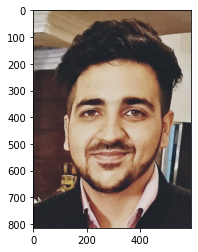

In [0]:
path = '/content/photo.jpeg'
image = np.expand_dims(plt.imread(path),0)
plt.imshow(image[0])

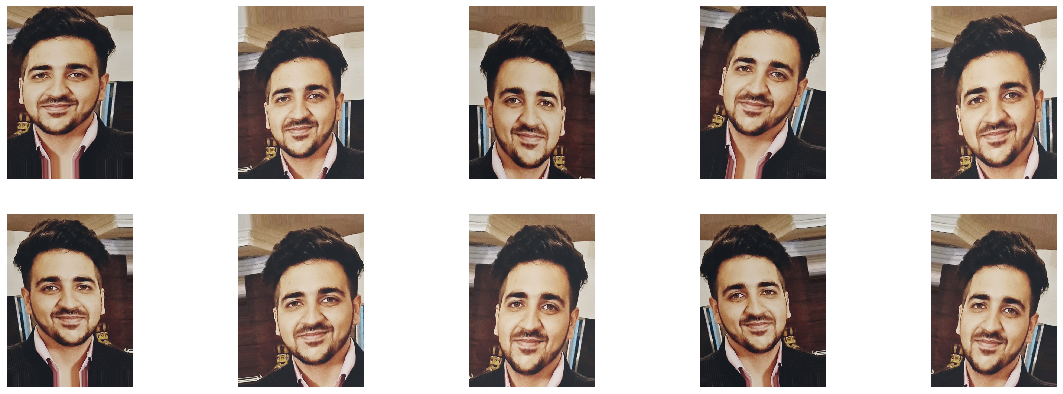

In [0]:
augmentation = img.flow(image)
aug_images = [next(augmentation)[0].astype(np.uint8) for i in range(10)]
plots(aug_images, figsize=(20,7), rows=2)

## Creating Images and Saving them in Same Directory.

- Reference: https://stackoverflow.com/revisions/53124455/2

In [1]:
import keras
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
%matplotlib inline

Using TensorFlow backend.


In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
img = ImageDataGenerator(rotation_range=10, width_shift_range=0.1, 
    height_shift_range=0.1, shear_range=0.15, zoom_range=0.1, 
    channel_shift_range=10., horizontal_flip=True)

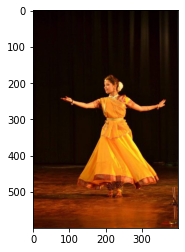

In [4]:
path = '/content/data_augmentation/8.jpg'
image = np.expand_dims(plt.imread(path),0)
plt.imshow(image[0])

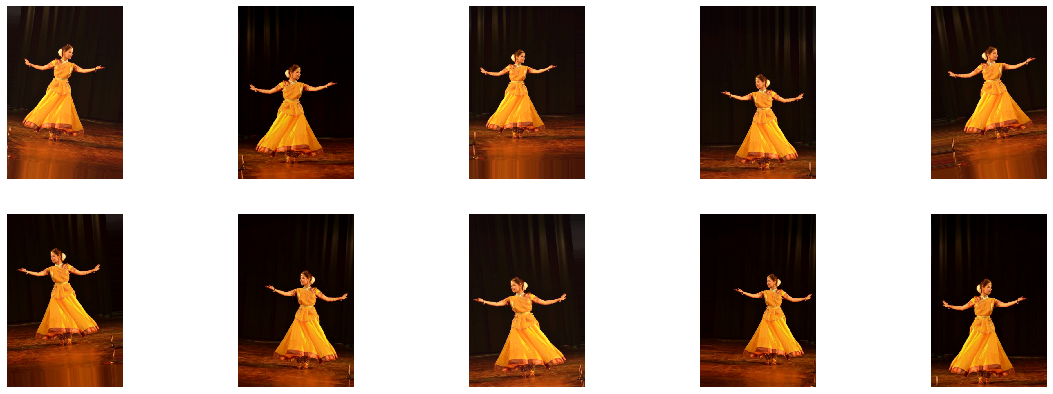

In [5]:
augmentation = img.flow(image)
aug_images = [next(augmentation)[0].astype(np.uint8) for i in range(10)]
plots(aug_images, figsize=(20,7), rows=2)

In [0]:
save_here = '/content/data_augmentation'
img.fit(image)

## img here is the object of ImageDataGenerator class.
## .fit it on the orginal image.

In [0]:
for x, val in zip(img.flow(image,save_to_dir=save_here,save_prefix='aug',save_format='png'),range(10)):
  pass
#this is where we figure out where to save   
# it will save the images as 'aug_0912' some number for every new augmented image
# here we define a range because we want 10 augmented images otherwise it will keep looping forever I think

## Multiple Images in Directory.

In [0]:
import os

names = []
save_here = '/content/data2/'
path = '/content/data2/'

for f in os.listdir(path):
  if f.endswith('.jpg'):
    image = np.expand_dims(plt.imread(path + f),0)
    fn, fext = os.path.splitext(f)
    names.append(fn)
    augmentation = img.flow(image)
    aug_images = [next(augmentation)[0].astype(np.uint8) for i in range(10)]
    img.fit(image)
    for x, val in zip(img.flow(image,save_to_dir=save_here,save_prefix='aug',save_format='png'),range(10)):
      pass

In [29]:
## Just to check the loop is working or not.
## Names list should have the all the names of the images which are present
## before Augmentation.
names

['7', '5']